# MNIST Handwritten Digit Recognition in Keras

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
mnist = tf.keras.datasets.mnist

%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

PATH  = r"C:\Users\jthan\OneDrive\Desktop\2023\PP\MNIST"
os.chdir(PATH)

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION'] = 'python'

## Data preprocessing

In [4]:
from tensorflow.keras.utils import to_categorical

RANDOM_STATE = 42

# Invert the pixel values
train_images = 255 - train_images
test_images = 255 - test_images

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Flatten the images.
train_images = train_images.reshape((train_images.shape[0], 28 * 28))
test_images = test_images.reshape((test_images.shape[0], 28 * 28))

# one-hot encode the labels
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)


In [5]:
train_images.shape

(60000, 784)

## Model training

In [6]:
model = tf.keras.models.Sequential([
     tf.keras.layers.Dense(512, activation='relu', input_shape=(28*28,)),  
     tf.keras.layers.Dense(256, activation='relu'),  
     tf.keras.layers.Dense(10, activation='softmax') 
])

model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

print(model.summary())

model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2645 - accuracy: 0.9179 - val_loss: 0.2125 - val_accuracy: 0.9299
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1359 - accuracy: 0.9582 - val_loss: 0.1308 - val_accuracy: 0.9581
Epoch 3/10
1875/187

## Hyperparameter Tuning

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

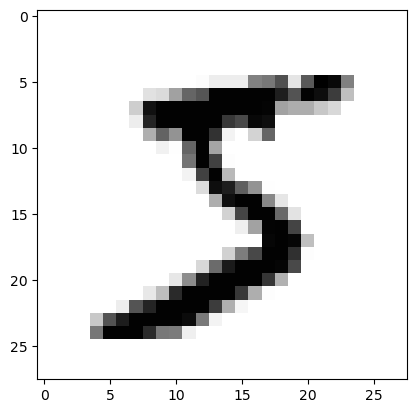

In [5]:
def visualize_vector(image_vector, prediction:int = 999):
    '''
    Visualizes the image vector.
    
    Parameters:
        image_vector (np.array): 1D array of the image.
        
    Returns:
        None
    '''
    #assert image_vector.shape == (1,784)

    image_2d = image_vector.reshape((28, 28))

    plt.imshow(image_2d, cmap='gray')
    if prediction != 999:
        plt.title(f'Prediction: {prediction}')
    plt.axis('off')
    plt.show()

visualize_vector(train_images[0], train_labels[0])

## Export Model

In [7]:
model.save('models/model_savedmodel')

INFO:tensorflow:Assets written to: models/model_savedmodel\assets
